In [14]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
#create a set of random lat and long combinations
lats = np.random.uniform(low= -90.000, high= 90.000, size=1500)
lngs = np.random.uniform(low= -180.000, high= 180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [16]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [17]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

78.56882026049684 -57.0747140068118
-29.731049877853835 -104.72181140914263
56.8550209883858 101.48910787228891
-78.65851703814657 93.87651290316677
-38.606730485264016 -113.714739330581
-46.46418508252621 -148.73391783339312
-56.66700160385984 -100.43437532112131
-58.36018469638162 31.323780938715345
-4.475188925354445 84.57508048125055
-6.49009532378777 -57.98714974154939
-0.2507455216610879 -110.15258026788351
80.9137174958611 -39.89567724155944
62.076173179030235 -22.827269502161528
-23.135853135740476 140.366470326948
-58.638304548389364 114.91089859690953
-47.18612744129267 104.75358707050117
45.74441585589133 132.18814813023994
78.04092287212356 -31.660091522786672
13.749560142995676 -74.99875362141759
2.593646444191961 -83.07915009533262
19.822264734840672 -92.46555741119025
-20.318823165645142 172.2449254826078
23.899878206684292 0.4689569766566706
89.96992334403882 -98.35044084259881
-34.80773203024777 36.94811778751426
-8.03076942495494 -156.53005228786856
-6.852840921286088

In [18]:
from citipy import citipy

In [19]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [20]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [34]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [22]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [23]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | upernavik
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | bratsk
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | hambantota
Processing Record 9 of Set 1 | jacareacanga
Processing Record 10 of Set 1 | ixtapa
Processing Record 11 of Set 1 | tasiilaq
Processing Record 12 of Set 1 | grindavik
Processing Record 13 of Set 1 | mount isa
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | mishan
Processing Record 16 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 17 of Set 1 | santa marta
Processing Record 18 of Set 1 | muisne
Processing Record 19 of Set 1 | carmen
Processing Record 20 of Set 1 | isangel
Processing Record 21 of Set 1 | tessalit
Processing Record 22 of Set 1 | qaanaaq
Proc

Processing Record 41 of Set 4 | sibiti
Processing Record 42 of Set 4 | malanje
Processing Record 43 of Set 4 | lebu
Processing Record 44 of Set 4 | puurmani
Processing Record 45 of Set 4 | cabo san lucas
Processing Record 46 of Set 4 | mar del plata
Processing Record 47 of Set 4 | avarua
Processing Record 48 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 49 of Set 4 | saint george
Processing Record 50 of Set 4 | zalantun
Processing Record 1 of Set 5 | airai
Processing Record 2 of Set 5 | batagay
Processing Record 3 of Set 5 | chirongui
Processing Record 4 of Set 5 | dzhusaly
City not found. Skipping...
Processing Record 5 of Set 5 | ballina
Processing Record 6 of Set 5 | baghdad
Processing Record 7 of Set 5 | palmer
Processing Record 8 of Set 5 | casa grande
Processing Record 9 of Set 5 | hualmay
Processing Record 10 of Set 5 | killybegs
Processing Record 11 of Set 5 | naica
Processing Record 12 of Set 5 | leh
Processing Record 13 of Set 5 | mitu
Processing Record

Processing Record 31 of Set 8 | bolshoy lug
Processing Record 32 of Set 8 | busayra
Processing Record 33 of Set 8 | kumylzhenskaya
Processing Record 34 of Set 8 | hervey bay
Processing Record 35 of Set 8 | patharia
Processing Record 36 of Set 8 | chernyshevsk
Processing Record 37 of Set 8 | bam
Processing Record 38 of Set 8 | nieuw amsterdam
Processing Record 39 of Set 8 | new norfolk
Processing Record 40 of Set 8 | thompson
Processing Record 41 of Set 8 | san patricio
Processing Record 42 of Set 8 | encheng
Processing Record 43 of Set 8 | salym
Processing Record 44 of Set 8 | trairi
Processing Record 45 of Set 8 | boende
Processing Record 46 of Set 8 | hihifo
City not found. Skipping...
Processing Record 47 of Set 8 | ipixuna
Processing Record 48 of Set 8 | boueni
Processing Record 49 of Set 8 | huarmey
Processing Record 50 of Set 8 | chifeng
Processing Record 1 of Set 9 | oussouye
Processing Record 2 of Set 9 | tias
Processing Record 3 of Set 9 | srednekolymsk
Processing Record 4 of 

Processing Record 14 of Set 12 | harindanga
Processing Record 15 of Set 12 | mangai
Processing Record 16 of Set 12 | chara
Processing Record 17 of Set 12 | punta alta
Processing Record 18 of Set 12 | yantai
Processing Record 19 of Set 12 | newport
Processing Record 20 of Set 12 | trincomalee
Processing Record 21 of Set 12 | baykit
Processing Record 22 of Set 12 | lakhipur
Processing Record 23 of Set 12 | batsfjord
Processing Record 24 of Set 12 | mwinilunga
Processing Record 25 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 26 of Set 12 | gemena
Processing Record 27 of Set 12 | medeiros neto
Processing Record 28 of Set 12 | aksu
Processing Record 29 of Set 12 | tatarsk
Processing Record 30 of Set 12 | do rud
City not found. Skipping...
Processing Record 31 of Set 12 | broken hill
Processing Record 32 of Set 12 | lucapa
Processing Record 33 of Set 12 | tutoia
Processing Record 34 of Set 12 | lithgow
Processing Record 35 of Set 12 | mattru
Processing Record 36 of Set 

In [24]:
len(city_data)

577

In [25]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Upernavik,72.7868,-56.1549,23.45,76,100,8.52,GL,2022-10-03 19:58:18
1,Rikitea,-23.1203,-134.9692,70.74,76,90,18.68,PF,2022-10-03 19:58:18
2,Bratsk,56.1325,101.6142,25.29,94,81,4.41,RU,2022-10-03 19:58:19
3,Albany,42.6001,-73.9662,56.34,54,100,5.95,US,2022-10-03 19:53:42
4,Mataura,-46.1927,168.8643,42.48,67,100,3.53,NZ,2022-10-03 19:58:19
5,Punta Arenas,-53.1500,-70.9167,51.82,76,75,8.05,CL,2022-10-03 19:54:36
6,Port Elizabeth,-33.9180,25.5701,63.10,81,0,14.97,ZA,2022-10-03 19:58:20
7,Hambantota,6.1241,81.1185,79.07,79,97,17.98,LK,2022-10-03 19:58:20
8,Jacareacanga,-6.2222,-57.7528,76.55,87,95,3.98,BR,2022-10-03 19:58:21
9,Ixtapa,20.7000,-105.2000,77.14,94,100,3.02,MX,2022-10-03 19:58:21


In [26]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Upernavik,GL,2022-10-03 19:58:18,72.7868,-56.1549,23.45,76,100,8.52
1,Rikitea,PF,2022-10-03 19:58:18,-23.1203,-134.9692,70.74,76,90,18.68
2,Bratsk,RU,2022-10-03 19:58:19,56.1325,101.6142,25.29,94,81,4.41
3,Albany,US,2022-10-03 19:53:42,42.6001,-73.9662,56.34,54,100,5.95
4,Mataura,NZ,2022-10-03 19:58:19,-46.1927,168.8643,42.48,67,100,3.53
5,Punta Arenas,CL,2022-10-03 19:54:36,-53.1500,-70.9167,51.82,76,75,8.05
6,Port Elizabeth,ZA,2022-10-03 19:58:20,-33.9180,25.5701,63.10,81,0,14.97
7,Hambantota,LK,2022-10-03 19:58:20,6.1241,81.1185,79.07,79,97,17.98
8,Jacareacanga,BR,2022-10-03 19:58:21,-6.2222,-57.7528,76.55,87,95,3.98
9,Ixtapa,MX,2022-10-03 19:58:21,20.7000,-105.2000,77.14,94,100,3.02


In [27]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [29]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

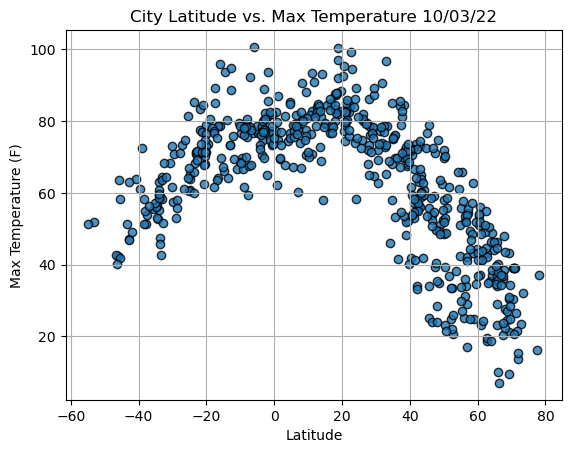

In [30]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

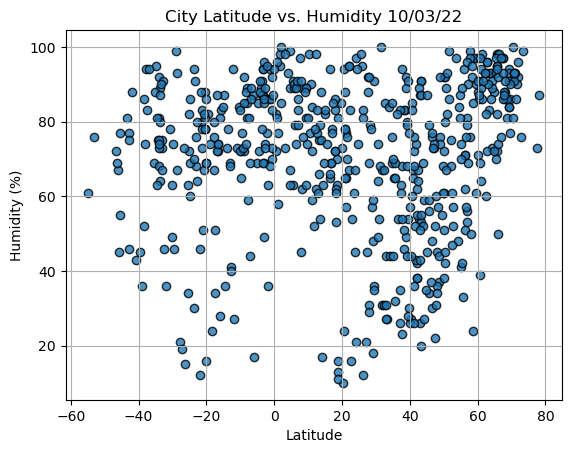

In [31]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

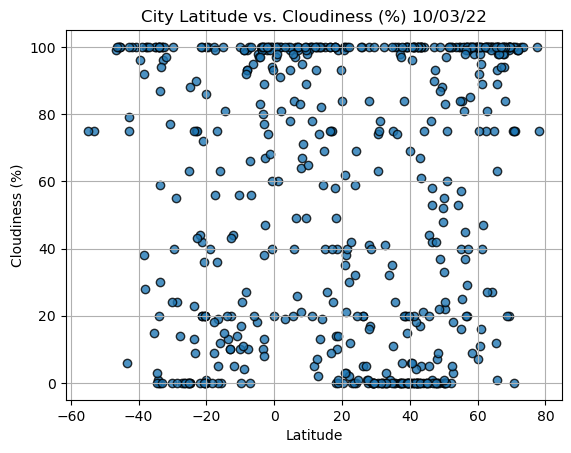

In [32]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

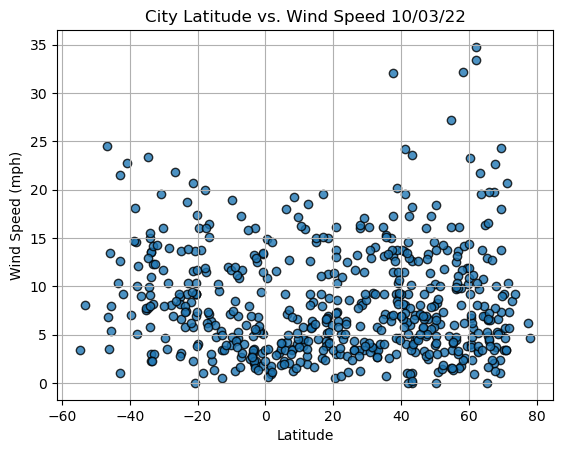

In [33]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()